<a href="https://colab.research.google.com/github/Rutba/learning_project/blob/main/Absenteeism_at_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/absenteeism_at_work/Absenteeism_at_work.csv', sep=";")

Note that we are providing the separator parameter when reading the data because,
although the original data file is in the CSV format, the ";" symbol has been used to
separate the various fields.

In order to print the dimensionality of the data, column types, and the number of
missing values, we can use the following code:

In [ ]:
print(f"Data dimension : {data.shape}")

for col in data.columns:
  print(f"Column: {col:35} | type: {str(data[col].dtype):7} | missing values: {data[col].isna().sum(): 3d} ")

Data dimension : (740, 21)
Column: ID                                  | type: int64   | missing values:   0 
Column: Reason for absence                  | type: int64   | missing values:   0 
Column: Month of absence                    | type: int64   | missing values:   0 
Column: Day of the week                     | type: int64   | missing values:   0 
Column: Seasons                             | type: int64   | missing values:   0 
Column: Transportation expense              | type: int64   | missing values:   0 
Column: Distance from Residence to Work     | type: int64   | missing values:   0 
Column: Service time                        | type: int64   | missing values:   0 
Column: Age                                 | type: int64   | missing values:   0 
Column: Work load Average/day               | type: float64 | missing values:   0 
Column: Hit target                          | type: int64   | missing values:   0 
Column: Disciplinary failure                | type: int64   

As we can see from these 21 columns, only one (Work Load Average/day)
does not contain integer values. Since no missing values are present in the data,
we can consider it quite clean. We can also derive some basic statistics by using the
describe method:

In [ ]:
# compute statistics on numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


Note that some of the columns, such as Month of absence, Day of the week,
Seasons, Education, Disciplinary failure, Social drinker, and
Social smoker, are encoding categorical values. So, we can back-transform the
numerical values to their original categories so that we have better plotting features.
We will perform the transformation by defining a Python dict object containing the
mapping and then applying the apply() function to each feature, which applies the
provided function to each of the values in the column. First, let's define the encoding
dict objects:

In [ ]:
# define encoding dictionaries
month_encoding = {1: "January", 2: "February", 3:"March",
                  4: "April", 5:"May", 6:"June",7:"July",
                  8:"August", 9:"September", 10:"October",
                  11:"November", 12:"December", 0:"Unknown"}
dow_encoding = {2:"Monday", 3:"Tuesday", 4:"Wednesday",
                5:"Thursday", 6:"Friday"}

season_encoding = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}

education_encoding = {1:"high_school", 2:"graduate", 3:"postgraduate",
                      4:"master_phd"}

yes_no_encoding = {0: "No", 1:"Yes"}

In [ ]:
#backtransform numerical variable to categorical
preprocessed_data = data.copy()
preprocessed_data["Month of absence"] = preprocessed_data["Month of absence"].apply(lambda x: month_encoding[x])

preprocessed_data["Day of the week"] = preprocessed_data["Day of the week"].apply(lambda x: dow_encoding[x])

preprocessed_data["Seasons"] = preprocessed_data["Seasons"].apply(lambda x: season_encoding[x])

preprocessed_data["Education"] = preprocessed_data["Education"].apply(lambda x: education_encoding[x])

preprocessed_data["Disciplinary failure"] = preprocessed_data["Disciplinary failure"].apply(lambda x: yes_no_encoding[x])

preprocessed_data["Social drinker"] = preprocessed_data["Social drinker"].apply(lambda x: yes_no_encoding[x])

preprocessed_data["Social smoker"] = preprocessed_data["Social smoker"].apply(lambda x: yes_no_encoding[x])

#transform columns
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


Based on the description of the data, the Reason for absence column contains
information about the absence, which is encoded based on the International Code
of Diseases (ICD). The following table represents the various encodings:

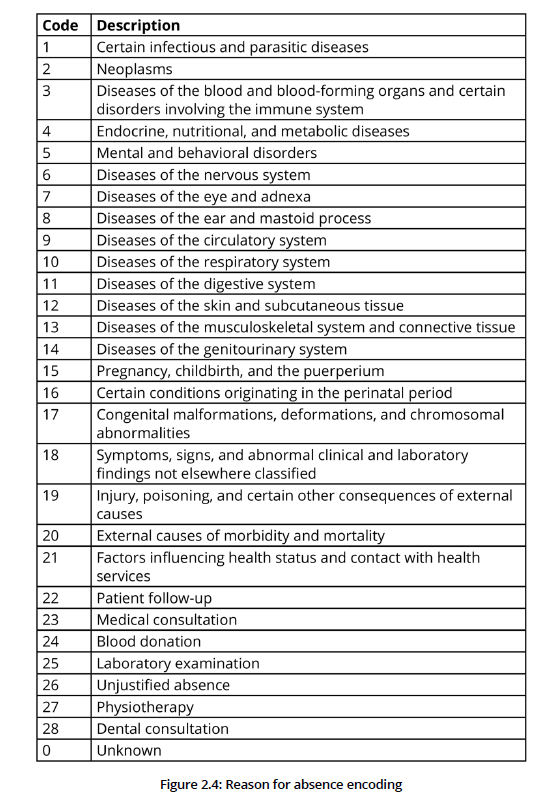

Note that only values 1 to 21 represent ICD encoding; values 22 to 28 are separate
reasons, which do not represent a disease, while value 0 is not defined—hence the
encoded reason Unknown. As all values contained in the ICD represent some type
of disease, it makes sense to create a new binary variable that indicates whether the
current reason for absence is related to some sort of disease or not. We will do this in
the following exercise.

## Identifying reasons for absence
In this exercise, we will create a new variable, called Disease, which indicates
whether a specific reason for absence is present in the ICD table or not

In [ ]:
"""
define function, which checks if the provided integer value
is contained in the ICD or not
"""

def in_icd(val):
  return "Yes" if val >= 1 and val <= 21 else "No"

In [ ]:
"""
Combine the .apply() method with the previously defined in_icd()
function in order to create the new Disease column in the
preprocessed dataset:
"""
preprocessed_data["Disease"] = preprocessed_data["Reason for absence"].apply(in_icd)

<Axes: xlabel='Disease', ylabel='count'>

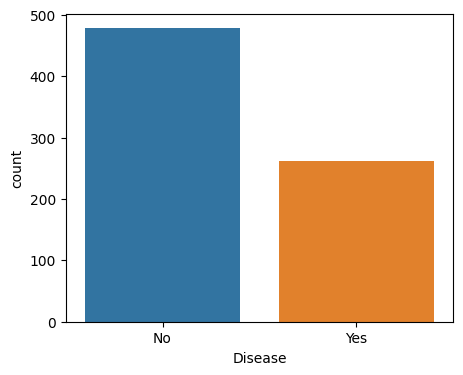

In [ ]:
"""
Use bar plots in order to compare the absences due to disease reasons:
"""
plt.figure(figsize=(5,4))
sns.countplot(data=preprocessed_data, x = 'Disease')
#plt.savefig('figs/disease_plot.png', format='png', dpi=300)

Here, we are using the seaborn .countplot() function, which is quite handy when
creating this type of bar plot, in which we want to know the total number of entries
for each specific class. As we can see, the number of reasons for absence that are not
listed in the ICD table is almost twice the number of listed ones.

## Initial analysis of the reason for absence
Let's start with a simple analysis of the Reason for absence column. We will try
to address questions such as, what is the most common reason for absence? Does
being a drinker or smoker have some effect on the causes? Does the distance to work
have some effect on the reasons? And so on. Starting with these types of questions
is often important when performing data analysis, as this is a good way to obtain
confidence and understanding of the data.


The first thing we are interested in is the overall distribution of the absence reasons
in the data—that is, how many entries we have for a specific reason for absence in
our dataset.

Text(0, 0.5, 'Number of entries per reason of absence')

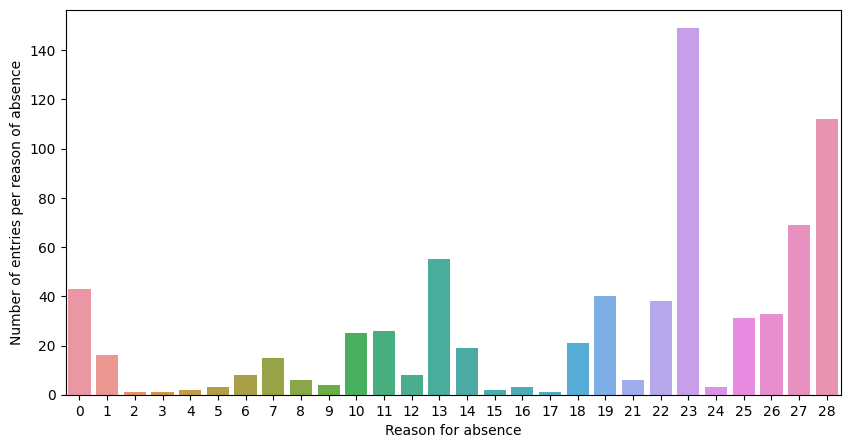

In [ ]:
# get the number of entries for each reason for absence

plt.figure(figsize=(10, 5))

ax = sns.countplot(data=preprocessed_data, x="Reason for absence")
ax.set_ylabel("Number of entries per reason of absence")


Note that we also used the Disease column as the hue parameter. This helps
us to distinguish between disease-related reasons (listed in the ICD encoding) and
those that aren't. Following Figure 2.3, we can assert that the most frequent reasons
for absence are related to medical consultations (23), dental consultations (28),
and physiotherapy (27). On the other hand, the most frequent reasons for absence
encoded in the ICD encoding are related to diseases of the musculoskeletal system
and connective tissue (13) and injury, poisoning, and certain other consequences of
external causes (19).

In order to perform a more accurate and in-depth analysis of the data, we will
investigate the impact of the various features on the Reason for absence and
Absenteeism in hours columns in the following sections.

## Analysis of social drinkers and smokers
Let's begin with an analysis of the impact of being a drinker or smoker on employee
absenteeism. As smoking and frequent drinking have a negative impact on health
conditions, we would expect that certain diseases are more frequent in smokers and
drinkers than others. Note that in the absenteeism dataset, 56% of the registered
employees are drinkers, while only 7% are smokers.


<Axes: xlabel='Reason for absence', ylabel='count'>

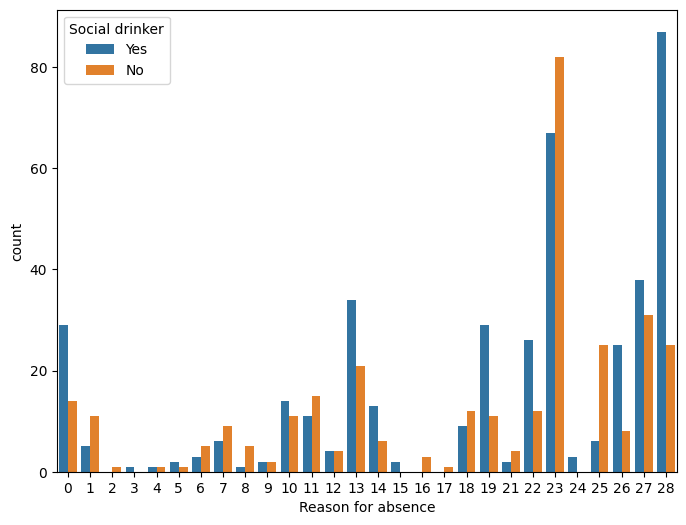

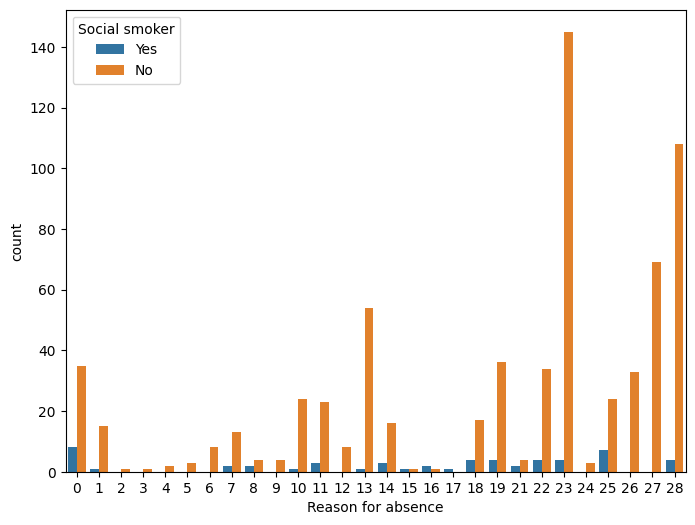

In [ ]:
# plot reasons for absence against being a social drinker/smoker

plt.figure(figsize=(8,6))
sns.countplot(data=preprocessed_data, x = "Reason for absence",
              hue="Social drinker", hue_order=["Yes", "No"])

plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x ="Reason for absence",
              hue="Social smoker", hue_order=["Yes", "No"])

In [ ]:
"""
Next, calculate the actual count for social drinkers and smokers from the
preprocessed data:
"""
print(preprocessed_data["Social drinker"].value_counts())
print(preprocessed_data["Social drinker"].value_counts(normalize=True))
print("\n\n")
print(preprocessed_data["Social smoker"].value_counts())
print(preprocessed_data["Social smoker"].value_counts(normalize=True))

Yes    420
No     320
Name: Social drinker, dtype: int64
Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64



No     686
Yes     54
Name: Social smoker, dtype: int64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


As we can see from the resulting plots, a significant difference between drinkers
and non-drinkers can be observed in absences related to Dental consultations (28).
Furthermore, as the number of social smokers is quite small (only 7% of the entries),
it is very hard to say whether there is actually a relationship between the absence
reasons and smoking. A more rigorous approach in this direction would be to analyze
the conditional probabilities of the different absence reasons, which are based on
being a social drinker or smoker.

Conditional probability is a measure that tells us the probability of an event's
occurrence, assuming that another event has occurred. From a mathematical
perspective, given a set of events Ω and a probability measure P on Ω and given two
events A and B in Ω with the unconditional probability of B being greater than zero
(that is, P(B) > 0), we can define the conditional probability of A given B as follows:

## $ p(A|B) =\frac{P(A ∩ B)}{P(B)} $



In other words, the probability of A given B is equal to the probability of A and B
both happening, divided by the probability of B happening. Let's consider a simple
example that will help us understand the usage of conditional probability. This is a
classic probability problem. Suppose that your friend has two children, and you know
that one of them is male. We want to know what the probability is that your friend
has two sons. First, we have to identify all the possible events in our event space Ω. If
we denote with B the event of having a boy, and with G the event of having a girl, then
the event space contains four possible events:

### $ Ω = {BB, BG, GB, GG} $

They each have a probability of 0.25. Following the notations from the definition, we
can define the first event like so:

### A = {having two boys} = {BB}

We can define the ltter event like so:

### B = {one of the children is a boy} = {BG, GB, BB}

Now, our initial problem translates into computing P(A|B). With this, we get the
following equation:

###  $ P(A|B) = \frac{A(A∩B}{P(B)} = \frac{P(BB)}{P(BG,GB,BB)} = \frac{1/4}{3/4}=1/3$



In [ ]:
# computation of conditional probability
sample_space = set(["BB", "BG", "GB", "GG"])
event_a = set(["BB"])
event_b = set(["BB", "BG", "GB"])
cond_prob = (0.25*len(event_a.intersection(event_b))) \
/ (0.25*len(event_b))
print(round(cond_prob, 4))

0.3333


Note that by using the definition of conditional probability, we could address
questions such as, "What is the probability of a reason for absence being related to
laboratory examinations, assuming that an employee is a social drinker?" In other
words, if we denote the "employee is absent for laboratory examinations" event
with A, and the "employee is a social drinker" event with B, the probability of the
"employee is absent due to laboratory examination reasons, given that employee is a
social drinker" event can be computed by the previous formula.

## Identifying Reasons of Absence with Higher Probability Among Drinkers and Smokers
We will compute the conditional probabilities of the different reasons
for absence, assuming that the employee is a social drinker or smoker


To identify the conditional probabilities, first compute the unconditional
probabilities of being a social drinker or smoker. Verify that both the
probabilities are greater than zero, as they appear in the denominator of the
conditional probabilities. Do this by counting the number of social drinkers and
smokers and dividing these values by the total number of entries, like so:

$ P(social\space drinker)= \frac{number\space of\space socail\space drinkers}{total \space number \space of\space entries}$

$ P(social\space smoker)= \frac{number\space of\space socail\space smokers}{total \space number \space of\space entries}$


In [ ]:
# compute probabilities of being a drinker and smoker
drinker_prob = preprocessed_data["Social drinker"].value_counts(normalize=True)["Yes"]

smoker_prob = preprocessed_data["Social smoker"].value_counts(normalize=True)["Yes"]

print(f"P(social drinker) = {drinker_prob:.3f} | P(social smoker) = {smoker_prob:.3f}")

P(social drinker) = 0.568 | P(social smoker) = 0.073


Next, compute the probabilities of being a social drinker/smoker and being
absent for each reason of absence. For a specific reason of absence (say Ri),
these probabilities are defined as follows:

$ P(social\space drinker\space and \space absent \space for \space reason \space R_1) = \frac{number \space social\space drinker\space and \space absent \space for \space reason \space R_1}{total \space number \space of \space entries}$

$ P(social\space smoker\space and \space absent \space for \space reason \space R_1) = \frac{number \space social\space smokers\space and \space absent \space for \space reason \space R_1}{total \space number \space of \space entries}$

In [ ]:
#create mask for social drinkers/smokers
drinker_mask = preprocessed_data["Social drinker"] == "Yes"
smoker_mask = preprocessed_data["Social smoker"] == "Yes"

#Compute the total number of entries and the number of absence reasons, masked by drinkers/smokers:
total_entries = preprocessed_data.shape[0]
absence_drinker_prob = preprocessed_data["Reason for absence"][drinker_mask].value_counts()/total_entries
absence_smoker_prob = preprocessed_data["Reason for absence"][smoker_mask].value_counts()/total_entries

In [ ]:
#Compute the conditional probabilities by dividing the computed probabilities for each reason of absence

cond_prob = pd.DataFrame(index=range(0,29))
cond_prob["P(Absence | social drinker)"] = absence_drinker_prob / drinker_prob
cond_prob["P(Absence | social smoker)"] = absence_smoker_prob / smoker_prob

print(cond_prob)


    P(Absence | social drinker)  P(Absence | social smoker)
0                      0.069048                    0.148148
1                      0.011905                    0.018519
2                           NaN                         NaN
3                      0.002381                         NaN
4                      0.002381                         NaN
5                      0.004762                         NaN
6                      0.007143                         NaN
7                      0.014286                    0.037037
8                      0.002381                    0.037037
9                      0.004762                         NaN
10                     0.033333                    0.018519
11                     0.026190                    0.055556
12                     0.009524                         NaN
13                     0.080952                    0.018519
14                     0.030952                    0.055556
15                     0.004762         

Text(0, 0.5, 'Conditional probability')

<Figure size 640x480 with 0 Axes>

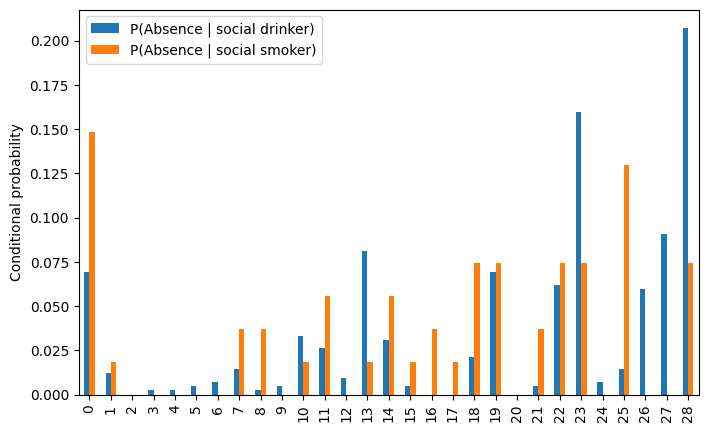

In [ ]:
# plot probabilities
plt.figure()
ax = cond_prob.plot.bar(figsize=(8,5))
ax.set_ylabel("Conditional probability")

As we can observe from the previous plot, the highest reason for absence for
drinkers is dental consultations (28), followed by medical consultations (23).
Smokers' absences, however, are mostly due to unknown reasons (0) and
laboratory examinations (25).

## Identifying the Probability of Being a Drinker/Smoker, Conditioned to Absence Reason

In this exercise, you will compute the conditional probability of being a social drinker
or smoker, conditioned on the reason for absence. In other words (where Ri is the
reason for which an employee is absent), we want to compute the probabilities of an
employee being a social drinker P(social drinker |Ri), or smoker P(social
smoker |Ri), as follows:

$P(social \space drinker | R_i)= \frac{P(R_i|social \space drinker) P(social \space drinker)}{P(R_i)} $

$P(social \space smoker| R_i ) = \frac{P(R_i |social \space smoker) P(social \space smoker)}{P(R_i)}$



Since we already computed P(Ri | social drinker), P(Ri | social
smoker), P(social drinker), and P(social smoker), in the previous
exercise, you only need to compute P(Ri) for each reason of absence R_i:

In [ ]:
# compute reason for absence probabilities

absence_prob = preprocessed_data["Reason for absence"].value_counts(normalize = True)

In [ ]:
# compute conditional probabilities for drinker/smoker

cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))

print(cond_prob_drinker_smoker)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [ ]:
cond_prob_drinker_smoker["P(social drinker | Absence)"] =  cond_prob["P(Absence | social drinker)"]*drinker_prob/absence_prob

cond_prob_drinker_smoker["P(social smoker | Absence)"] =  cond_prob["P(Absence | social smoker)"]*smoker_prob/absence_prob

print(cond_prob_drinker_smoker)

    P(social drinker | Absence)  P(social smoker | Absence)
0                      0.674419                    0.186047
1                      0.312500                    0.062500
2                           NaN                         NaN
3                      1.000000                         NaN
4                      0.500000                         NaN
5                      0.666667                         NaN
6                      0.375000                         NaN
7                      0.400000                    0.133333
8                      0.166667                    0.333333
9                      0.500000                         NaN
10                     0.560000                    0.040000
11                     0.423077                    0.115385
12                     0.500000                         NaN
13                     0.618182                    0.018182
14                     0.684211                    0.157895
15                     1.000000         

Text(0, 0.5, 'Conditional probability')

<Figure size 640x480 with 0 Axes>

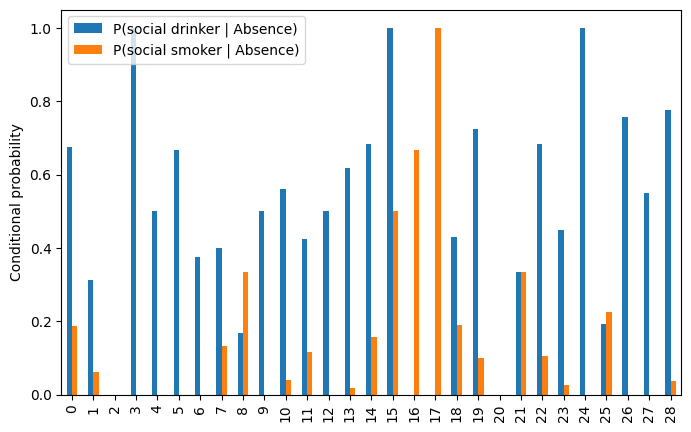

In [ ]:
plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(8,5))
ax.set_ylabel("Conditional probability")

As we can see from the resulting plot, the conditional probabilities of being
a social drinker/smoker are quite high, once an absence with a certain reason
occurs. This is due to the fact that the number of entries is very small; as such, if all the registered employees who were absent for a certain reason are smokers, the probability of being a smoker, once that reason has been registered, will be equal to one (based on the available data).

To complete our analysis on the social drinkers and smokers, analyze the distribution of the hours of absenteeism based on the two classes (being a
social drinker/smoker versus not being). A useful type of plot for this type of comparison is the violin plot, which can be produced using the seaborn
violinplot() function:

<Axes: xlabel='Social drinker', ylabel='Absenteeism time in hours'>

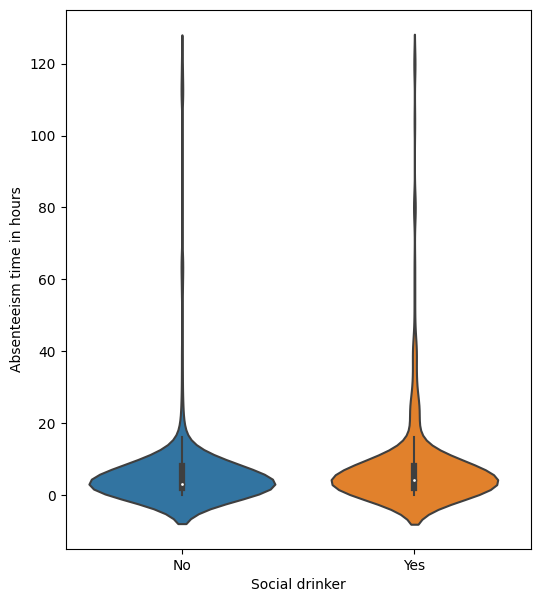

In [ ]:
# create violin plots of the absenteeism time in hours

plt.figure(figsize=(6,7))
sns.violinplot(x="Social drinker", y ="Absenteeism time in hours",
               data=preprocessed_data, order=["No", "Yes"])



<Axes: xlabel='Social smoker', ylabel='Absenteeism time in hours'>

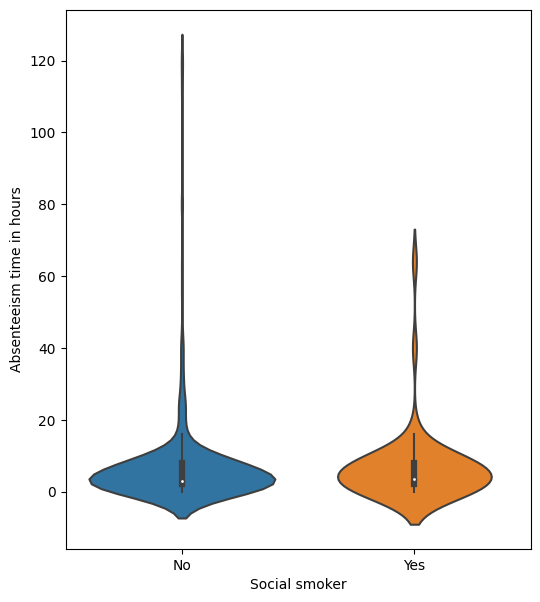

In [ ]:
plt.figure(figsize=(6,7))
sns.violinplot(x="Social smoker", y="Absenteeism time in hours",
               data= preprocessed_data, order=["No","Yes"])

As we can observe from Figure 2.27, despite some differences in the outliers
between smokers and non-smokers, there is no substantial difference in the
distribution of absenteeism hours in drinkers and smokers.

To assess this statement in a rigorous statistical way, perform hypothesis testing
on the absenteeism hours (with a null hypothesis stating that the average
absenteeism time in hours is the same for drinkers and non-drinkers):

In [ ]:
from scipy.stats import ttest_ind
hours_col = "Absenteeism time in hours"

# test mean absenteeism time for drinkers
drinkers_mask = preprocessed_data["Social drinker"] == "Yes"
hours_drinkers = preprocessed_data.loc[drinkers_mask, hours_col]
hours_non_drinkers = preprocessed_data.loc[~drinkers_mask, hours_col]
drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]}, p-value: {drinkers_test[1]}")

Statistic value: 1.7713833295243993, p-value: 0.07690961828294651


In [ ]:
# test mean absenteeism time for smokers
smokers_mask = preprocessed_data["Social smoker"] == "Yes"
hours_smokers = preprocessed_data.loc[smokers_mask, hours_col]
hours_non_smokers = preprocessed_data.loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]},p-value: {smokers_test[1]}")

Statistic value: -0.24277795417700243,p-value: 0.8082448720154971


As we can see, the p-value of both tests is above the critical value of 0.05, which
means that we cannot reject the null hypothesis. In other words, we cannot
say that there is a statistically significant difference in the absenteeism hours
between drinkers (and smokers) and non-drinkers (and non-smokers).

Note that in the previous paragraph, we performed hypothesis tests, with a
null hypothesis for the average absenteeism hours being equal for drinkers (and
smokers) and non-drinkers (and non-smokers). Nevertheless, the average hours
may still be equal, but their distributions may be different.

Perform a **Kolmogorov-Smirnov** test to assess the difference in the distributions
of two samples:

In [ ]:
# perform Kolmogorov-Smirnov test for comparing the distributions
from scipy.stats import ks_2samp

ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f"Drinkers comparison: statistics = {ks_drinkers[0]:.3f}, pvalue={ks_drinkers[1]:.3f}")
print(f"Smokers comparison: statistics={ks_smokers[0]:.3f}, pvalue={ks_smokers[1]:.3f}")

Drinkers comparison: statistics = 0.135, pvalue=0.002
Smokers comparison: statistics=0.104, pvalue=0.607


The p-value for the drinkers dataset is lower than the critical 0.05, which is strong
evidence against the null hypothesis of the two distributions being equal. On the
other hand, as the p-value for the smokers dataset is higher than 0.05, you cannot
reject the null hypothesis.

In this section, we investigated the relationship between the different reasons for
absence, as well as social information about the employees (such as being smokers or
drinkers). In the next section, we will analyze the impact of the employees' body mass
index on their absenteeism.

## BODY MASS INDEX
The Body Mass Index (BMI) is defined as a person's weight in kilograms, divided by
the square of their height in meters:

$ BMI = \frac{weight[kg]}{height[m]}$

BMI is a universal way to classify people as underweight, healthy weight,
overweight, and obese, based on tissue mass (muscle, fat, and bone) and height.
The following plot indicates the relationship between weight and height for the
various categories:

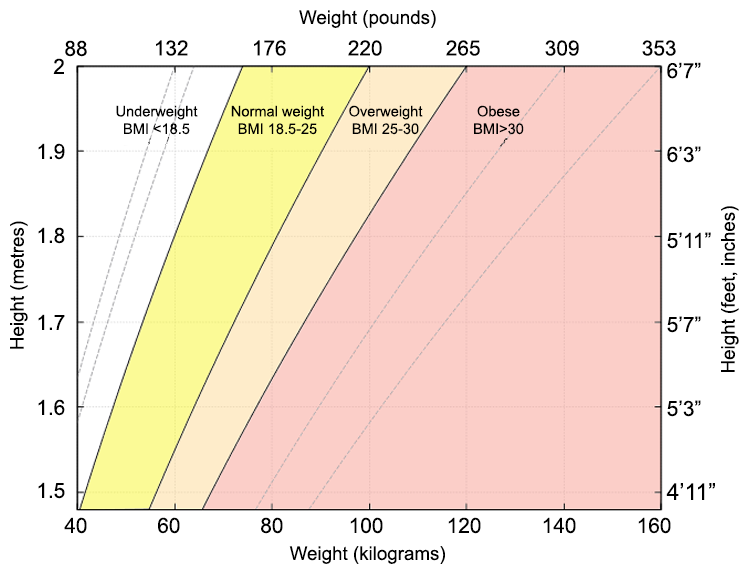

According to the preceding plot, we can build the four categories (underweight,
healthy weight, overweight, and obese) based on the BMI values:

In [ ]:
"""
define function for computing the BMI category, based on BMI value
"""
def get_bmi_category(bmi):
  if bmi < 18.5:
    category = "underweight"
  elif bmi >= 18.5 and bmi < 25:
    category = "healthy weight"
  elif bmi >= 25 and bmi < 30:
    category = "overweight"
  else:
    category = "obese"
  return  category

# compute BMI category
preprocessed_data["BMI category"] = preprocessed_data["Body mass index"].apply(get_bmi_category)



we can plot the number of entries for each category

<Axes: xlabel='BMI category', ylabel='count'>

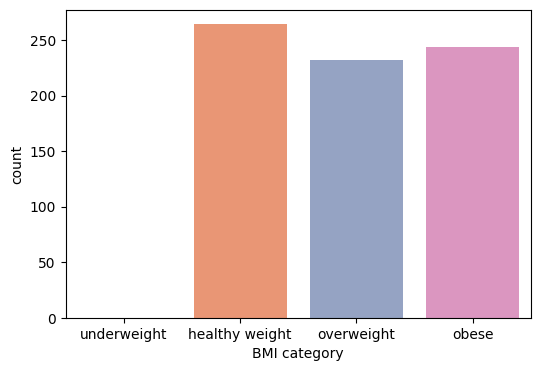

In [ ]:
#plot number of entries for each category

plt.figure(figsize=(6,4))
sns.countplot(data = preprocessed_data, x ="BMI category",
              order = ["underweight", "healthy weight", "overweight", "obese"], palette = "Set2")


We can see that no entries for the underweight category are present, with the
data being almost uniformly distributed among the remaining three categories. Of
course, this is an alarming indicator, as more than 60% of the employees are either
overweight or obese.

Now, let's check how the different BMI categories are related to the reason for
absence. More precisely, we would like to see how many employees there are based
on their body mass index and their reason for absence. This can be done with the
following code:

Text(0.5, 0, 'Number of employees')

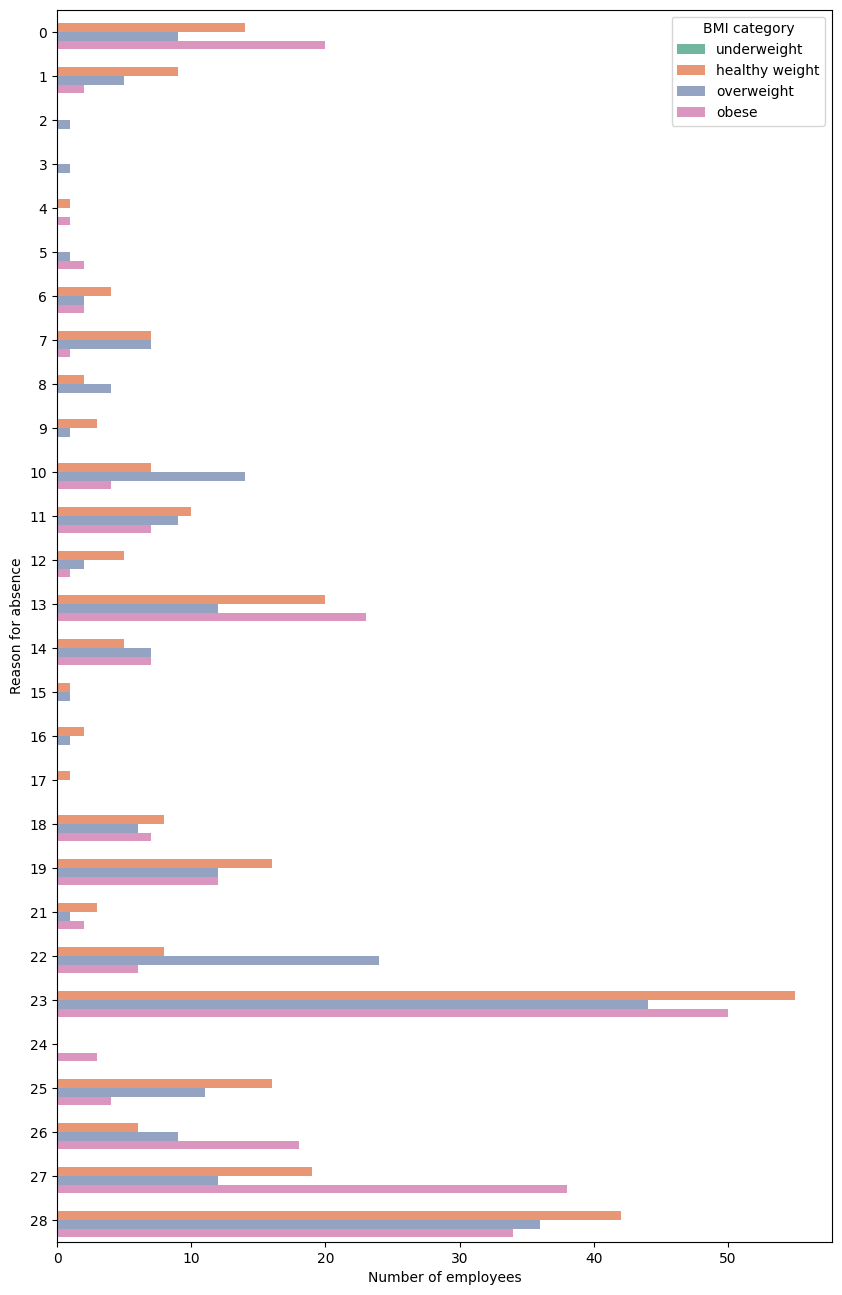

In [ ]:
# plot BMI categories vs reason for absence
plt.figure(figsize=(10, 16))
ax = sns.countplot(data=preprocessed_data, y="Reason for absence", hue="BMI category",
                    hue_order=["underweight", "healthy weight", "overweight", "obese"],
                    palette="Set2")
ax.set_xlabel("Number of employees")


Unfortunately, no clear pattern arises from the preceding plot. In other words, for
each reason for absence, an (almost) equal number of employees with different body
mass indexes are present.

We can also investigate the distribution of absence hours for the different
BMI categories:

<Axes: xlabel='BMI category', ylabel='Absenteeism time in hours'>

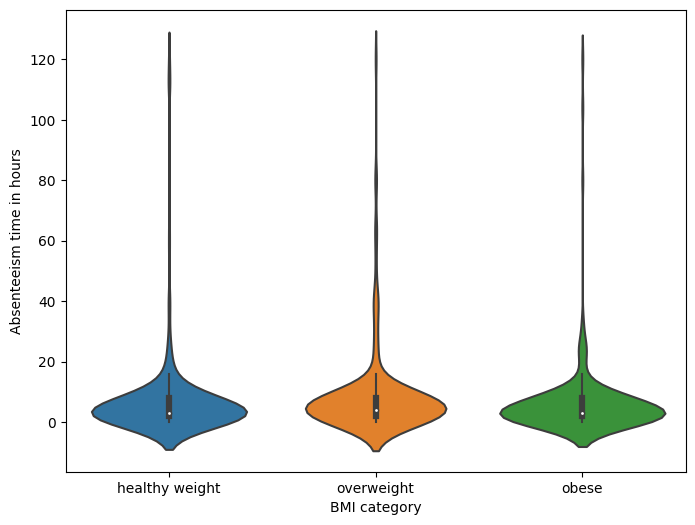

In [ ]:
# plot distribution of absence time, based on BMI category
plt.figure(figsize=(8,6))
sns.violinplot(x="BMI category",y="Absenteeism time in hours",
              data=preprocessed_data, order=["healthy weight", "overweight", "obese"])


As we can observe from Figure 2.31 and Figure 2.32, no evidence states that BMI and
obesity levels influence the employees' absenteeism.

## AGE AND EDUCATION FACTORS
Age and education may also influence employees' absenteeism. For instance, older
employees might need more frequent medical treatment, while employees with
higher education degrees, covering positions of higher responsibility, might be less
prone to being absent.

First, let's investigate the correlation between age and absence hours. We will create a
regression plot, in which we'll plot the **Age** column on the x axis and **Absenteeism
time in hours** on the y axis. We'll also include the **Pearson's correlation
coefficient** and its p-value, where the null hypothesis is that the correlation coefficient
between the two features is equal to zero:

Text(0.5, 1.0, 'Correlation=0.066 | p-value=0.074')

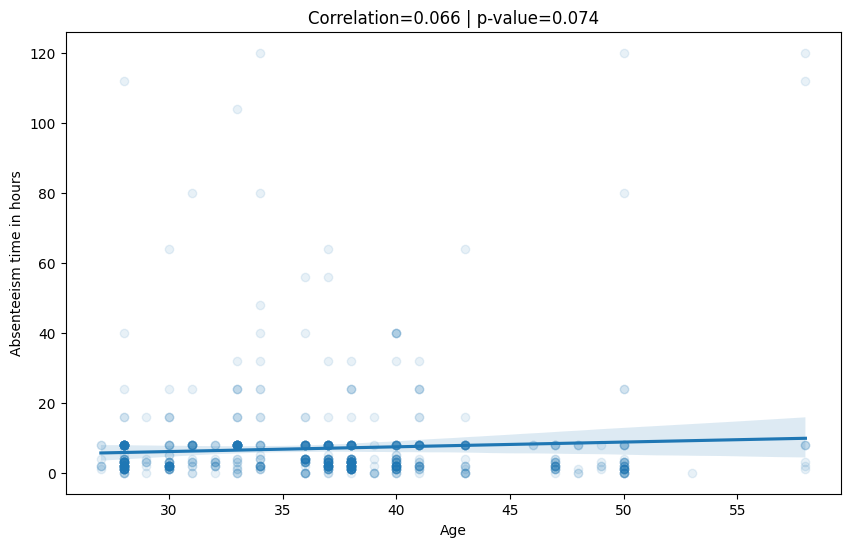

In [ ]:
from scipy.stats import pearsonr
# compute Pearson's correlation coefficient and p-value
pearson_test = pearsonr(preprocessed_data["Age"],preprocessed_data["Absenteeism time in hours"])

"""
create regression plot and add correlation coefficient in the title
"""
plt.figure(figsize=(10, 6))
ax = sns.regplot(x="Age", y="Absenteeism time in hours",data=preprocessed_data, scatter_kws={"alpha":0.1})

ax.set_title(f"Correlation={pearson_test[0]:.03f} | p-value={pearson_test[1]:.03f}")



As we can observe from the resulting plot, no significant pattern occurs. Furthermore,
the correlation coefficient is extremely small (0.066), and its p-value is above the
threshold of 0.05, which is an additional indicator that no relationship is present
between the Age and Absenteeism time in hours features.

We can also check whether age has some impact on the reason for absence. We'll
perform this analysis in the next exercise.

## INVESTIGATE THE IMPACT OF AGE ON REASON FOR ABSENCE

In this exercise, we'll investigate the relationship between the Age feature and the
various reasons for absence.

<Axes: xlabel='Disease', ylabel='Age'>

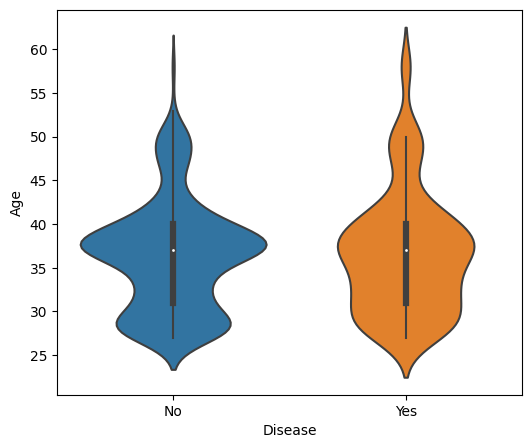

In [ ]:
# create violin plot between the Age and Disease columns
plt.figure(figsize=(6,5))
sns.violinplot(x="Disease", y="Age", data=preprocessed_data)

From Step 1, we can see some differences between the two distributions of age.
In fact, for samples with ICD encoded reasons for absence (labeled Yes in the
Disease column), we can observe that slightly more samples are present for
older employees. To confirm this difference in distributions, perform hypothesis
tests on the means and distributions of the two groups:

In [ ]:
"""
get Age entries for employees with Disease == Yes and Disease == No
"""
disease_mask = preprocessed_data["Disease"] == "Yes"
disease_ages = preprocessed_data["Age"][disease_mask]
no_disease_ages = preprocessed_data["Age"][~disease_mask]

In [ ]:
# perform hypothesis test for equality of means
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f"Test for equality of means: statistic={test_res[0]:0.3f}, pvalue={test_res[1]:0.3f}")

Test for equality of means: statistic=0.630, pvalue=0.529


In [ ]:
# test equality of distributions via Kolmogorov-Smirnov test
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f"KS test for equality of distributions: statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")


KS test for equality of distributions: statistic=0.057, pvalue=0.619


From the results of the two tests, we can conclude that there is no statistically
significant difference between the two distributions. Thus, age is neither an
indicator for the length of an absence nor for its type.

Now investigate the relationship between age and reason for absence:

<Axes: xlabel='Reason for absence', ylabel='Age'>

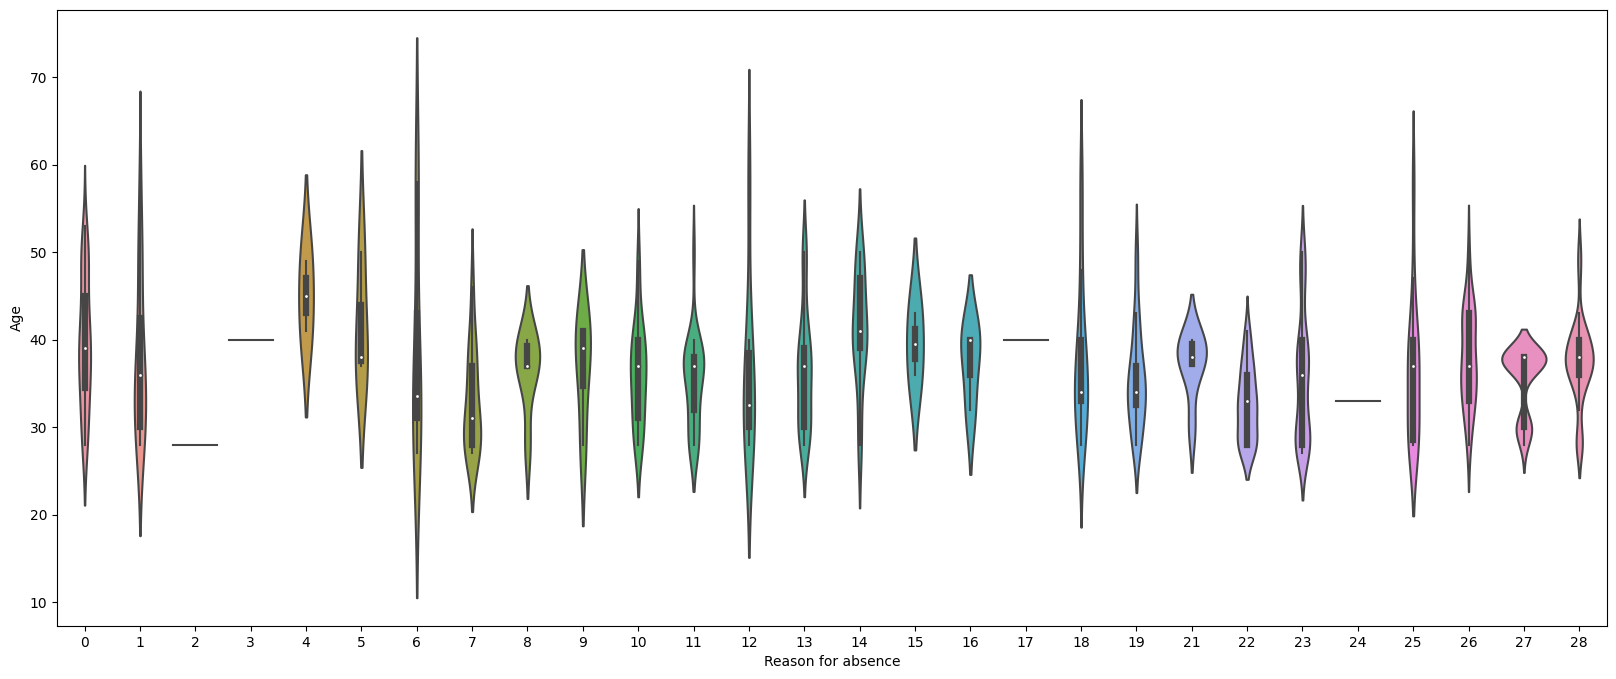

In [ ]:
# violin plot of reason for absence vs age
plt.figure(figsize=(20,8))
sns.violinplot(x="Reason for absence", y="Age", \
data=preprocessed_data)

In light of the previously performed analysis, you can conclude that age has no impact
on the employees' absenteeism.

## INVESTIGATE THE IMPACT OF EDUCATION ON REASON FOR ABSENCE

In this exercise, we will analyze the existing relationship between the Reason for
absence and Education columns. We will start by looking at the percentage of
employees with a certain educational degree, and then relate those numbers to the
various reasons for absence.


In [ ]:
"""
Before starting the analysis, check the percentage of employees in the data that
hold a certain degree:
"""
education_types = ["high_school", "graduate", "postgraduate", "master_phd"]

counts = preprocessed_data["Education"].value_counts()
percentages = preprocessed_data["Education"].value_counts(normalize=True)

for educ_type in education_types:
  print(f"Education type: {educ_type:12s} | Counts : {counts[educ_type]:6.0f} | Percentages : {100*percentages[educ_type]:4.1f}")


Education type: high_school  | Counts :    611 | Percentages : 82.6
Education type: graduate     | Counts :     46 | Percentages :  6.2
Education type: postgraduate | Counts :     79 | Percentages : 10.7
Education type: master_phd   | Counts :      4 | Percentages :  0.5


We can see that most of the employees in the data have a high school degree
(82.6%), which means that the data is highly biased toward these employees.

Create a distribution plot of the number of hours of absence, based on the level
of education of the employees:

<Axes: xlabel='Education', ylabel='Absenteeism time in hours'>

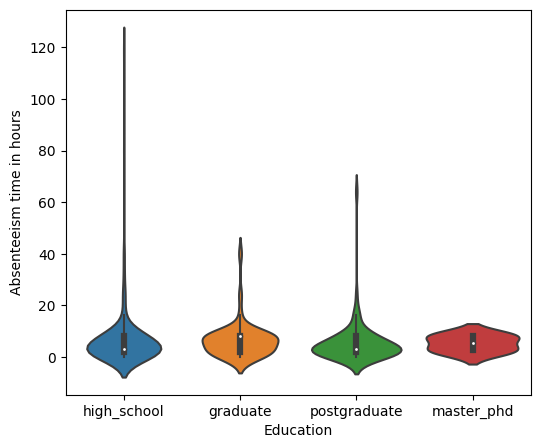

In [ ]:
# distribution of absence hours, based on education level
plt.figure(figsize=(6,5))
sns.violinplot(x="Education", y = "Absenteeism time in hours",
               data= preprocessed_data,
               order=["high_school", "graduate", "postgraduate", "master_phd"])


It seems most of the extreme cases of absence are among employees with lower
education levels. Compute the mean and standard deviation of the absence
duration for the different levels of education:

In [ ]:
# compute mean and standard deviation of absence hours
education_types = ["high_school", "graduate", "postgraduate", "master_phd"]

for educ_type in education_types:
  mask = preprocessed_data["Education"] == educ_type
  hours = preprocessed_data["Absenteeism time in hours"][mask]
  mean = hours.mean()
  stddev = hours.std()
  print(f"Education type : {educ_type:12s} | Mean : {mean:.3f} | Stddev: {stddev: .03f}")

Education type : high_school  | Mean : 7.190 | Stddev:  14.259
Education type : graduate     | Mean : 6.391 | Stddev:  6.754
Education type : postgraduate | Mean : 5.266 | Stddev:  7.963
Education type : master_phd   | Mean : 5.250 | Stddev:  3.202


We can see that both the mean and standard deviation of the hours of absence
are decreasing, meaning that highly educated employees tend to have shorter
absences. Of course, a higher degree of education is not a cause for such a
phenomenon and is more of an indication of it.

Now, check the reasons for absence based on the education level:

<Axes: xlabel='count', ylabel='Reason for absence'>

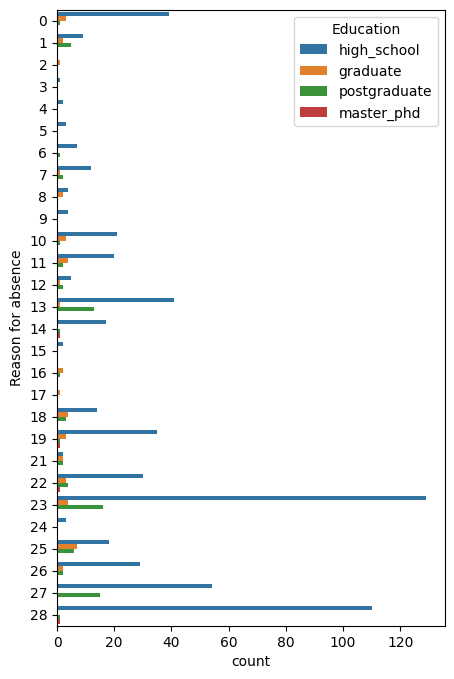

In [ ]:
# plot reason for absence, based on education level
plt.figure(figsize=(5,8))
sns.countplot(data=preprocessed_data,
              y= "Reason for absence",
              hue="Education",
              hue_order = ["high_school", "graduate", "postgraduate", "master_phd"]
)

From the preceding plot, we can observe that most of the absences relate to
employees with a high_school level of education. This is, of course, due to
the fact that most of the employees only have a high school degree (as observed
in Step 1). Furthermore, from our analysis in Step 2, we saw that most of the
absences that consisted of a greater number of hours were among employees
with a high_school education level.

One question that comes to mind is whether the probability of being absent for
more than one working week (40 hours) is greater for employees with a high
school degree compared to graduates. In order to address this question, use the
definition of conditional probability:

$P(extreme\space absence\space | degree=high\_school)=\frac {P(extreme \space absence,\space degree=high\_school)}{P(extreme\space absence)}$

$P(extreme\space absence\space | degree \neq high\_school)=\frac {P(extreme \space absence,\space degree \neq high\_school)}{P(extreme\space absence)}$

In [ ]:
"""
define threshold for extreme hours of absenteeism and get total number
of entries
"""

threshold = 40
total_entries = len(preprocessed_data)

#find entries with Education == high_school
high_school_mask = preprocessed_data["Education"]=="high_school"

# find entries with absenteeism time in hours more than threshold
extreme_mask = preprocessed_data["Absenteeism time in hours"] > threshold

# compute probability of having high school degree
prob_high_school = len(preprocessed_data[high_school_mask])/total_entries

# compute probability of having more than high school degree
prob_graduate = len(preprocessed_data[~high_school_mask]) /total_entries

"""
compute probability of having high school and being absent for more
than "threshold" hours
"""
prob_extreme_high_school = len(preprocessed_data[high_school_mask & extreme_mask])/total_entries



"""
compute probability of having more than high school and being absent
for more than "threshold" hours
"""
prob_extreme_graduate = len(preprocessed_data[~high_school_mask & extreme_mask])/total_entries

# compute and print conditional probabilities
cond_prob_extreme_high_school = prob_extreme_high_school /prob_high_school
cond_prob_extreme_graduate = prob_extreme_graduate/prob_graduate

print(f"P(extreme absence | degree = high_school) = {100*cond_prob_extreme_high_school:3.2f}")

print(f"P(extreme absence | degree != high_school) = {100*cond_prob_extreme_graduate:3.2f}")

preprocessed_data.head().T

P(extreme absence | degree = high_school) = 2.29
P(extreme absence | degree != high_school) = 0.78


,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


From the preceding computations, we can see that the probability of having an
absence of more than 40 hours for employees with a high school education degree
is 2.29%, which is approximately three times greater than the same probability for
employees with a university degree (0.78%).

## transportation costs and distance to work factors
Two possible indicators for absenteeism may also be the distance between home and
work (the Distance from Residence to Work column) and transportation
costs (the Transportation expense column). Employees who have to travel
longer, or whose costs for commuting to work are high, might be more prone
to absenteeism.

In this section, we will investigate the relationship between these variables and the
absence time in hours. Since we do not believe the aforementioned factors might be
indicative of disease problems, we will not consider a possible relationship with the
Reason for absence column.

First, let's start our analysis by plotting the previously mentioned columns
(Distance from Residence to Work and Transportation expense)
against the Absenteeism time in hours column:

<Figure size 600x800 with 0 Axes>

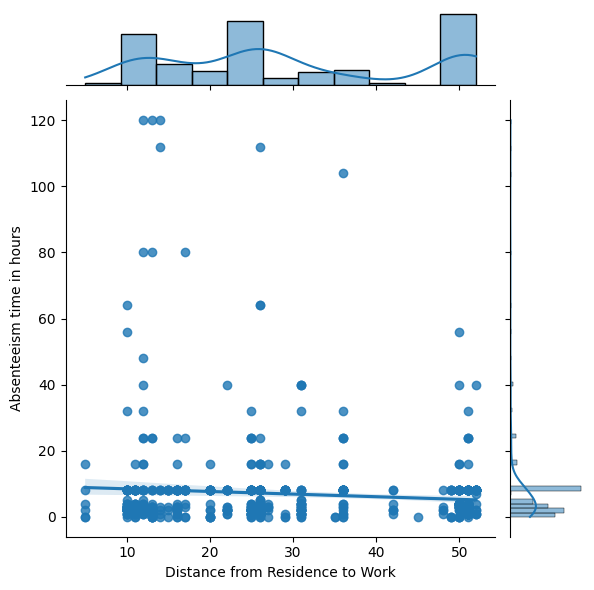

In [ ]:
# plot transportation costs and distance to work against hours
plt.figure(figsize=(6,8))
sns.jointplot(x="Distance from Residence to Work",
              y="Absenteeism time in hours",
              data=preprocessed_data, kind="reg")


Note that, here, we used the seaborn jointplot() function, which not only
produces the regression plot between the two variables but also estimates their
distribution

<Figure size 600x800 with 0 Axes>

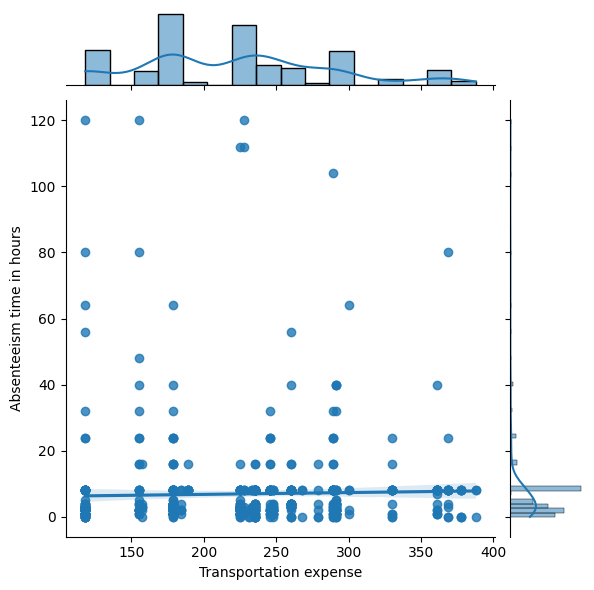

In [ ]:

plt.figure(figsize=(6,8))
sns.jointplot(x="Transportation expense",
              y="Absenteeism time in hours",
              data=preprocessed_data, kind="reg")


As we can see, the distributions of Distance from Residence to Work
and Transportation expense look close to normal distributions, while the
absenteeism time in hours is heavily right-skewed. This makes the comparison
between the variables difficult to interpret. One solution to this problem is to
transform the data into something close to a normal distribution. A handy way to
perform this transformation is to use the **Box-Cox** or **Yeo-Johnson transformations.**
Both are defined as a family of functions, depending on a parameter λ, under which
the transformed data is as close to normal as possible.

**The Box-Cox transformation is defined as follows:**

$f_λ(x)=\frac{x^λ -1}{λ} \space if \space λ\neq 0$

$f_λ(x)=log(x) \space if\space λ = 0$

The optimal value of the parameter λ is the one that results in the best
approximation of a normal distribution. Note that the Box-Cox transformation fails
if the data assumes negative values or zero. If this is the case, the Yeo-Johnson
transformation can be used:

$f_λ(x)=\frac{(x+1)^λ -1}{λ} \space if \space λ\neq 0, \space x ≥ 0 $

$f_λ(x)=log(x+1) \space if\space λ = 0, \space x ≥ 0 $

$f_λ(x)=\frac{[(-x+1)^{(2-λ)} -1]}{2-λ} \space if \space λ\neq 2, \space x < 0 $

$f_λ(x)=-log(-\lambda + 1) \space if\space λ = 2, \space x < 0 $

In Python, both transformations can be found in the **scipy.stats** module (in the
**boxcox()** and **yeojohnson()** functions, respectively).

Since the Absenteeism time in hours column contains zeros, we will apply the
Yeo-Johnson transformation in order to reproduce the plots

<Figure size 600x400 with 0 Axes>

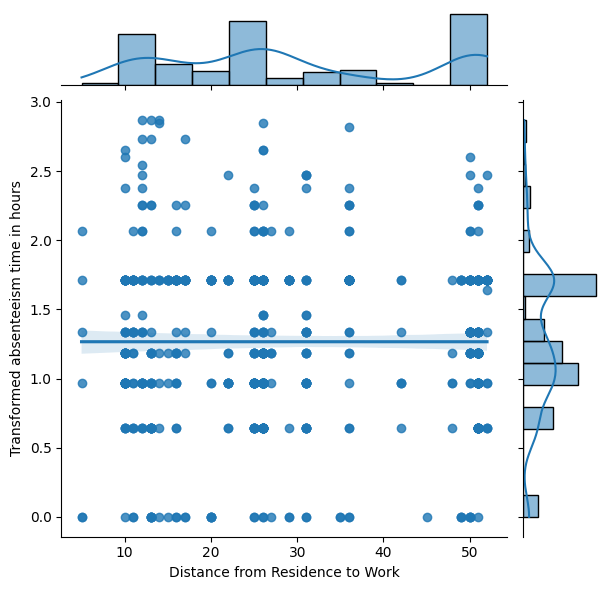

<Figure size 600x400 with 0 Axes>

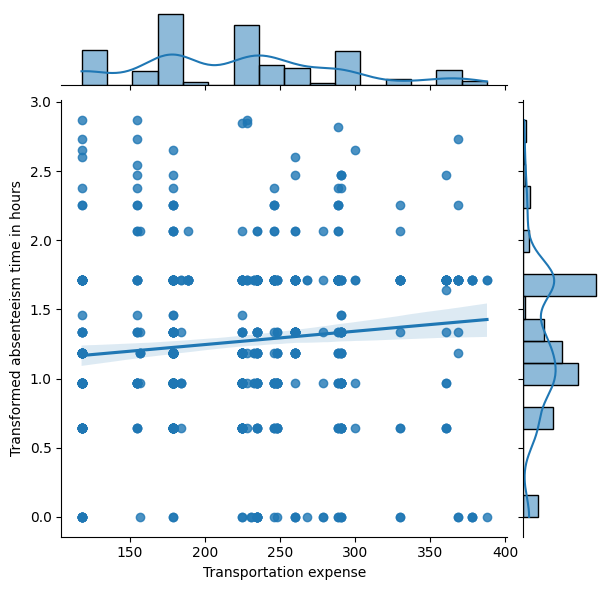

In [ ]:
# run Yeo-Johnson transformation and recreate previous plots
from scipy.stats import yeojohnson

hours = yeojohnson(preprocessed_data["Absenteeism time in hours"].apply(float))

distances = preprocessed_data["Distance from Residence to Work"]
expenses = preprocessed_data["Transportation expense"]



plt.figure(figsize=(6,4))
ax = sns.jointplot(x=distances, y=hours[0], kind="reg")
ax.set_axis_labels("Distance from Residence to Work","Transformed absenteeism time in hours")


plt.figure(figsize=(6, 4))
ax = sns.jointplot(x=expenses, y=hours[0], kind="reg")
ax.set_axis_labels("Transportation expense", \
"Transformed absenteeism time in hours")


We can also produce **kernel density estimation plots** (that is, plots that help us
visualize the probability density functions of continuous variables) by just changing
the type of the **jointplot()** function to **kde.**

<Figure size 1000x600 with 0 Axes>

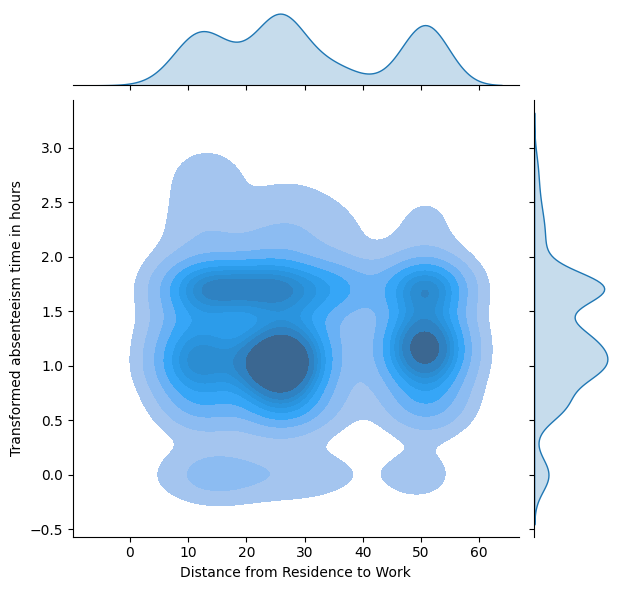

In [ ]:
# produce KDE plots
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=distances, y=hours[0], kind="kde", fill = True)
ax.set_axis_labels("Distance from Residence to Work",\
"Transformed absenteeism time in hours")

<Figure size 1000x600 with 0 Axes>

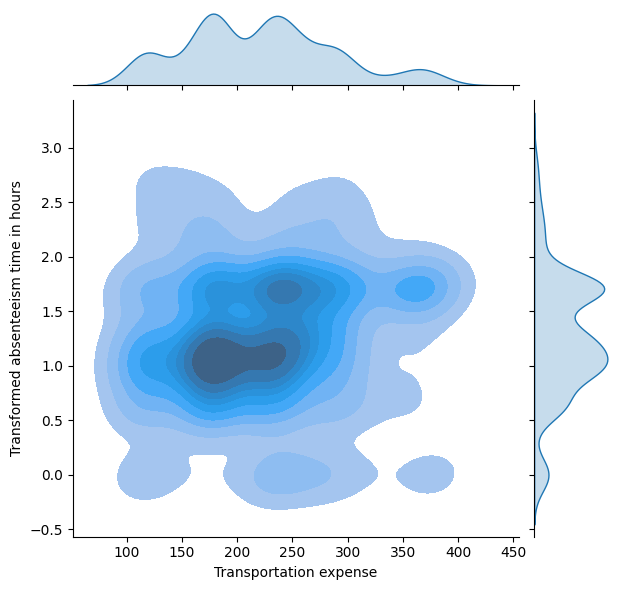

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.jointplot(x=expenses, y=hours[0], kind="kde", fill=True)
ax.set_axis_labels("Transportation expense", \
"Transformed absenteeism time in hours")

we can also see that the regression line between the variables
is almost flat for the Distance from Residence to Work column (which
is a clear indicator of zero correlation) but has a slight upward slope for the
Transportation Expense column. Therefore, we can expect a small
positive correlation:

In [ ]:
# investigate correlation between the columns

distance_corr = pearsonr(hours[0], distances)
expenses_corr = pearsonr(hours[0], expenses)
print(f"Distances correlation: corr={distance_corr[0]:.3f}, pvalue={distance_corr[1]:.3f}")
print(f"Expenses comparison: corr={expenses_corr[0]:.3f},  pvalue={expenses_corr[1]:.3f}")


Distances correlation: corr=-0.000, pvalue=0.999
Expenses comparison: corr=0.113,  pvalue=0.002


These results confirm our observation, stating that there is a slight positive
correlation between Transportation expense and Absenteeism time
in hours.

## TEMPORAL FACTORS
Factors such as day of the week and month may also be indicators for absenteeism.
For instance, employees might prefer to have their medical examinations on Friday
when the workload is lower, and it is closer to the weekend. In this section, we will
analyze the impact of the Day of the week and Month of absence columns,
and their impact on the employees' absenteeism.

Let's begin with an analysis of the number of entries for each day of the week and
each month:

Text(0.5, 1.0, 'Number of absences per day of the week')

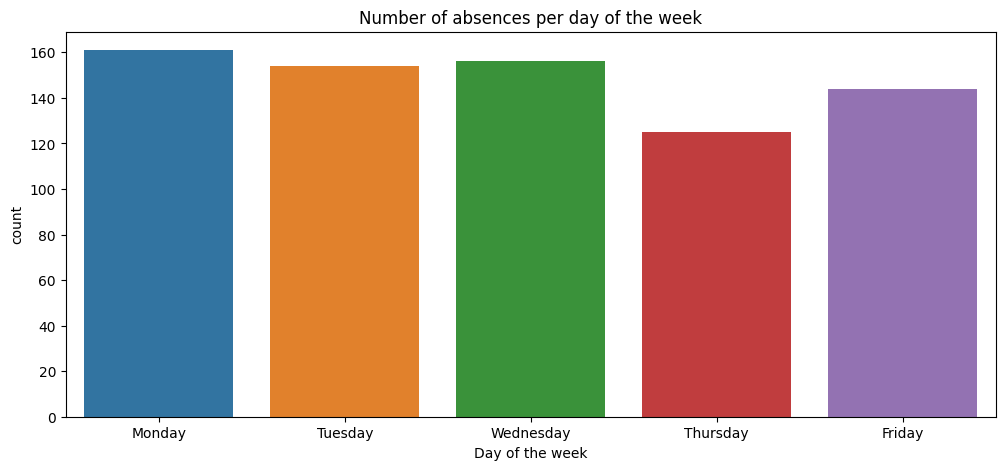

In [ ]:
# count entries per day of the week
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data,
                   x='Day of the week',
                   order=["Monday", "Tuesday",
                          "Wednesday", "Thursday", "Friday"])
ax.set_title("Number of absences per day of the week")

Text(0.5, 1.0, 'Number of absences per month')

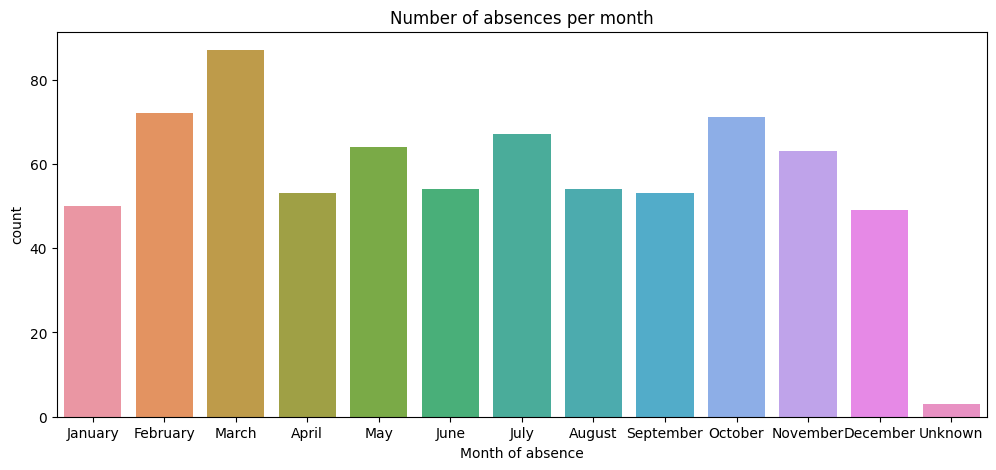

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=preprocessed_data,
                   x='Month of absence',
                   order=["January", "February", "March",
                          "April", "May", "June", "July",
                          "August", "September", "October",
                          "November", "December", "Unknown"])
ax.set_title("Number of absences per month")

From the preceding plots, we can't really see a substantial difference between
the different days of the week or months. It seems that fewer absences occur on
Thursday, while the month with the most absences is March, but it is hard to say that
the difference is significant.

Now, let's focus on the distribution of absence hours among the days of the week and
the months of the year. This analysis will be performed in the following exercise.

## Investigating Absence Hours, Based on the Day of the Week and the Month of the Year
In this exercise, you will be looking at the hours during which the employees were
absent for days of the week and months of the year

Consider the distribution of absence hours among the days of the week and
months of the year:

<Axes: xlabel='Day of the week', ylabel='Absenteeism time in hours'>

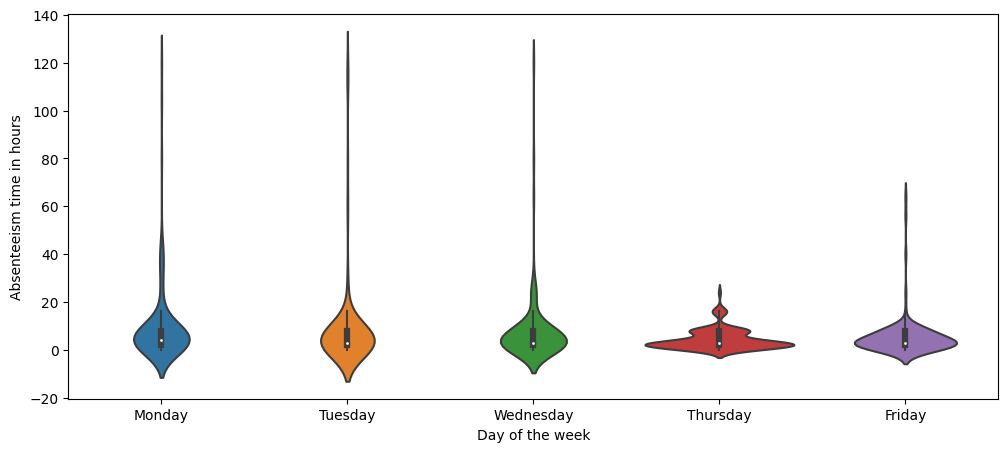

In [ ]:
# analyze average distribution of absence hours
plt.figure(figsize=(12,5))
sns.violinplot(x="Day of the week",
               y="Absenteeism time in hours",
               data=preprocessed_data,
               order=["Monday", "Tuesday",
                      "Wednesday", "Thursday", "Friday"])

<Axes: xlabel='Month of absence', ylabel='Absenteeism time in hours'>

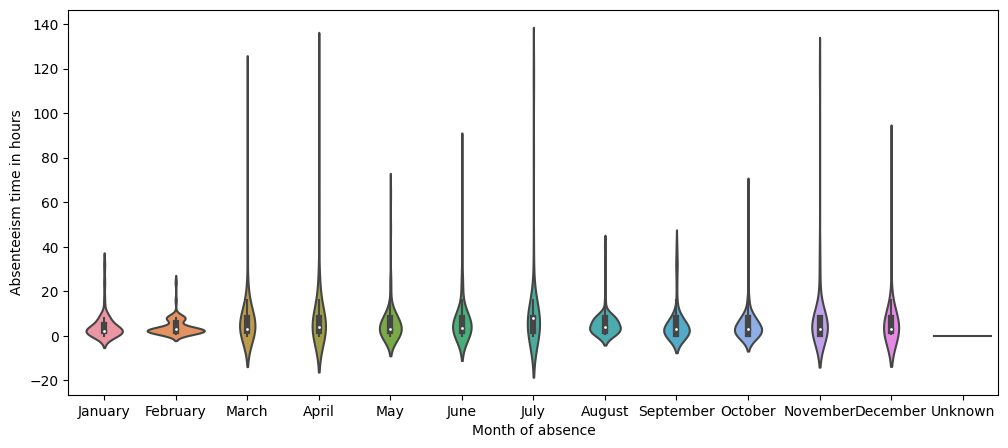

In [ ]:
plt.figure(figsize=(12,5))
sns.violinplot(x="Month of absence",
               y="Absenteeism time in hours",
               data=preprocessed_data,
               order=["January", "February",
                      "March", "April", "May", "June", "July",
                      "August", "September", "October",
                      "November", "December", "Unknown"])

Compute the mean and standard deviation of the absences based on the day of
the week:

In [ ]:
"""
compute mean and standard deviation of absence hours per day of the
week
"""
dows = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday"]

for dow in dows:
  mask = preprocessed_data["Day of the week"] == dow
  hours = preprocessed_data["Absenteeism time in hours"][mask]
  mean = hours.mean()
  stddev = hours.std()
  print(f"Day of the week: {dow:10s} | Mean : {mean:.03f} | Stddev: {stddev:.03f}")

Day of the week: Monday     | Mean : 9.248 | Stddev: 15.973
Day of the week: Tuesday    | Mean : 7.981 | Stddev: 18.027
Day of the week: Wednesday  | Mean : 7.147 | Stddev: 13.268
Day of the week: Thursday   | Mean : 4.424 | Stddev: 4.266
Day of the week: Friday     | Mean : 5.125 | Stddev: 7.911


Similarly, compute the mean and standard deviation based on the month,
as follows:

In [ ]:
"""
compute mean and standard deviation of absence hours per day of the
month
"""
months = ["January", "February", "March", "April", "May",
          "June", "July", "August", "September", "October",
          "November", "December"]

for month in months:
     mask = preprocessed_data["Month of absence"] == month
     hours = preprocessed_data["Absenteeism time in hours"][mask]
     mean = hours.mean()
     stddev = hours.std()
     print(f"Month: {month:10s} | Mean : {mean:8.03f} | Stddev: {stddev:8.03f}")

Month: January    | Mean :    4.440 | Stddev:    5.786
Month: February   | Mean :    4.083 | Stddev:    3.710
Month: March      | Mean :    8.793 | Stddev:   16.893
Month: April      | Mean :    9.094 | Stddev:   18.024
Month: May        | Mean :    6.250 | Stddev:   10.314
Month: June       | Mean :    7.611 | Stddev:   12.359
Month: July       | Mean :   10.955 | Stddev:   21.547
Month: August     | Mean :    5.333 | Stddev:    5.749
Month: September  | Mean :    5.509 | Stddev:    8.407
Month: October    | Mean :    4.915 | Stddev:    8.055
Month: November   | Mean :    7.508 | Stddev:   16.121
Month: December   | Mean :    8.449 | Stddev:   16.049


Observe that the average duration of the absences is slightly shorter on
Thursday (4.424 hours), while absences during July have the longest average
duration (10.955 hours). To determine whether these values are statistically
significant—that is, whether there is a statistically significant difference regarding
the rest of the days/months—use the following code snippet:

In [ ]:
# perform statistical test for avg duration difference
thursday_mask = preprocessed_data["Day of the week"] == "Thursday"
july_mask = preprocessed_data["Month of absence"] == "July"
thursday_data = preprocessed_data["Absenteeism time in hours"][thursday_mask]
no_thursday_data = preprocessed_data["Absenteeism time in hours"][~thursday_mask]
july_data = preprocessed_data["Absenteeism time in hours"][july_mask]
no_july_data = preprocessed_data["Absenteeism time in hours"][~july_mask]

thursday_res = ttest_ind(thursday_data, no_thursday_data)
july_res = ttest_ind(july_data, no_july_data)


print(f"Thursday test result: statistic={thursday_res[0]:.3f}, pvalue={thursday_res[1]:.3f}")
print(f"July test result: statistic={july_res[0]:.3f}, pvalue={july_res[1]:.3f}")


Thursday test result: statistic=-2.307, pvalue=0.021
July test result: statistic=2.605, pvalue=0.009


Since the p-values from both the statistical tests are below the critical value of 0.05,
we can conclude the following:

• There is a statistically significant difference between Thursdays and other days of
the week. Absences on Thursday have a shorter duration, on average.

• Absences during July are the longest over the year. Also, in this case, we can
reject the null hypothesis of having no difference.


From the analysis we've performed in this exercise, we can conclude that our initial
observations about the difference in absenteeism during the month of July and on
Thursdays are correct. Of course, we cannot claim that this is the cause, but only state
that certain trends exist in the data

<Axes: >

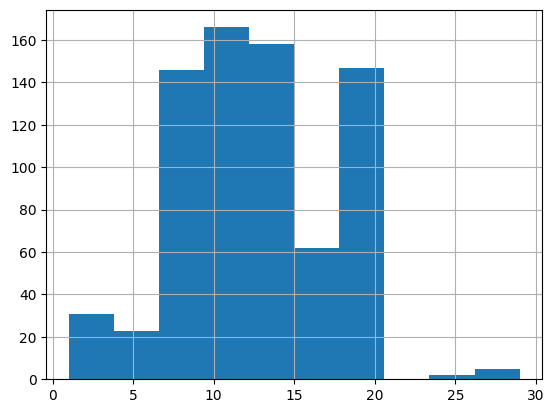

In [ ]:

preprocessed_data["Service time"].hist()

In [ ]:
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


## Analyzing the Service Time and Son Columns
In this activity, we will extend the analysis of the absenteeism dataset by exploring
the impact of two additional columns: Service time and Son.



Analyze the distribution of the **Service time** column by creating a kernel
density estimation plot (use the **seaborn.kdeplot()** function). Perform
a hypothesis test for normality (that is, a Kolmogorov-Smirnov test with the
**scipy.stats.kstest()** function). The KDE plot will be as follows:

Text(0.5, 0, 'Service time')

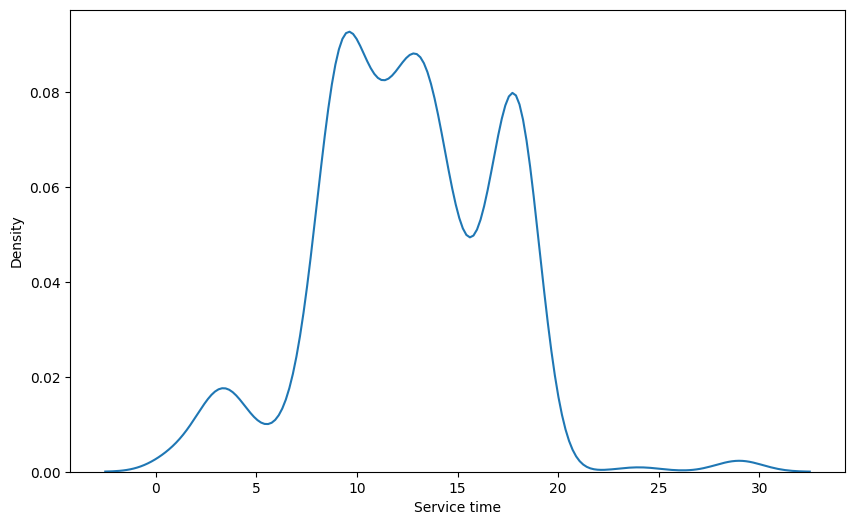

In [ ]:
# produce KDE plots
plt.figure(figsize=(10,6))
#ax=sns.kdeplot(data = preprocessed_data, x="Service time")
ax = sns.kdeplot(preprocessed_data["Service time"])
ax.set_xlabel("Service time")

In [ ]:
# test distribution  for normality, use kstest for one sample test
from scipy.stats import kstest
service_time_data = preprocessed_data["Service time"]
ks_res = kstest(service_time_data, 'norm')

print(f"KS test for normality of distribution: statistic={ks_res[0]:0.3f},  pvalue={ks_res[1]:0.3f}")

KS test for normality of distribution: statistic=0.989,  pvalue=0.000


From the resulting value of the test, we can reject the null hypothesis that the
**Service time** column has a normal distribution

Create a violin plot of the **Service time** column and **the Reason for
absence** column. Draw a conclusion about the observed relationship.

<Axes: xlabel='Reason for absence', ylabel='Service time'>

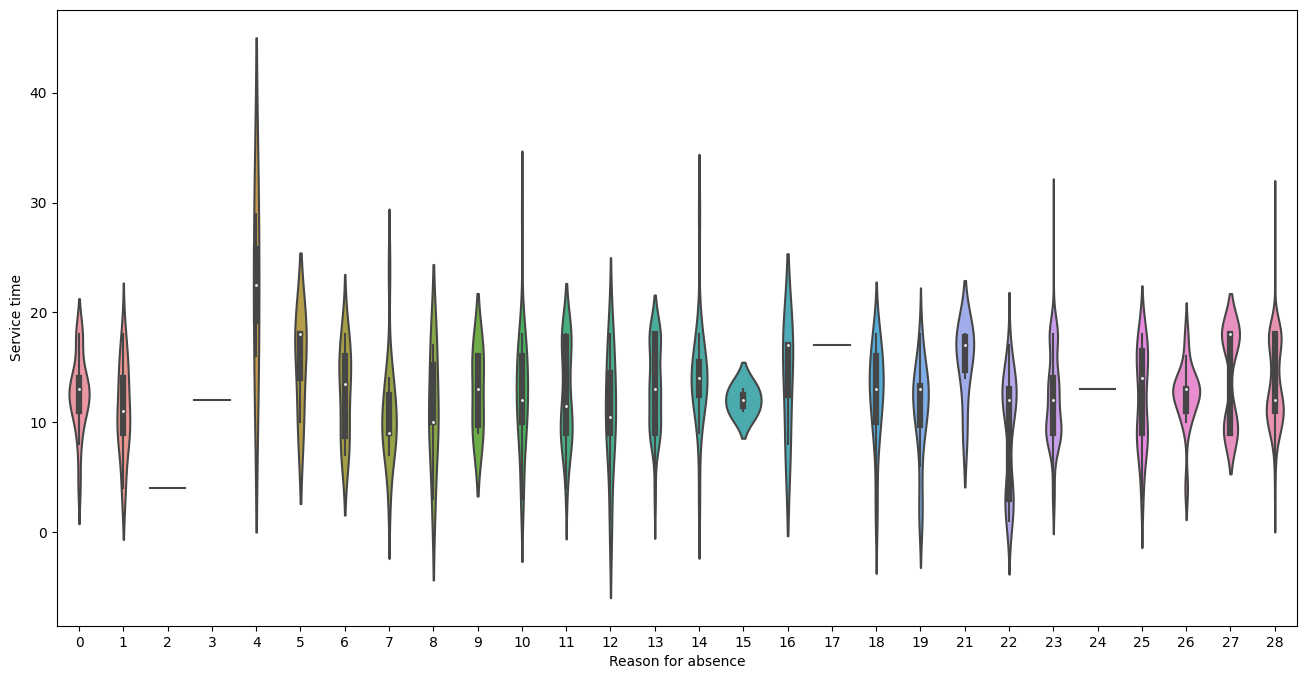

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(x="Reason for absence",
               y="Service time",
               data= preprocessed_data)


Create a **correlation** plot between the **Service time** and **Absenteeism
time in hours columns**.The output will be
as follows:

<Figure size 800x600 with 0 Axes>

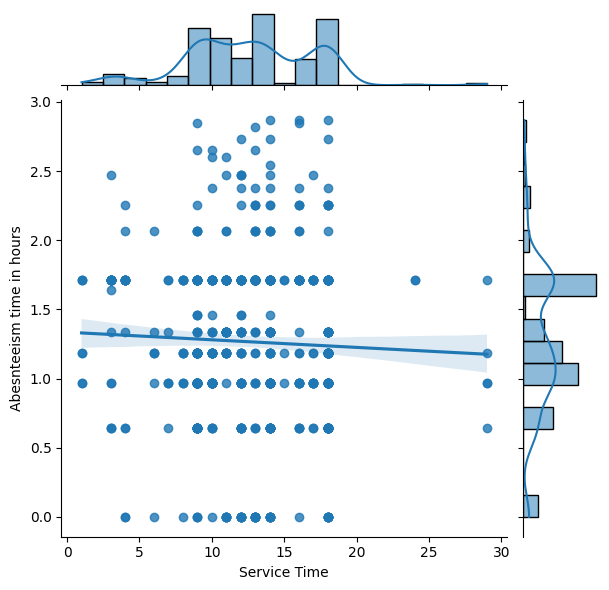

In [ ]:
"""
Since the Absenteeism time in hours column contains zeros, we will apply the
Yeo-Johnson transformation in order to reproduce the plots
"""

time= preprocessed_data["Service time"]
Abs_hours =yeojohnson(preprocessed_data["Absenteeism time in hours"].apply(float))
plt.figure(figsize=(8,6))
ax= sns.jointplot( x= time, y= Abs_hours[0],
                   kind="reg")
ax.set_axis_labels("Service Time", "Abesnteeism time in hours")

Analyze the distributions of service time for employees
with a different number of children (the Son column).

<Axes: xlabel='Son', ylabel='Service time'>

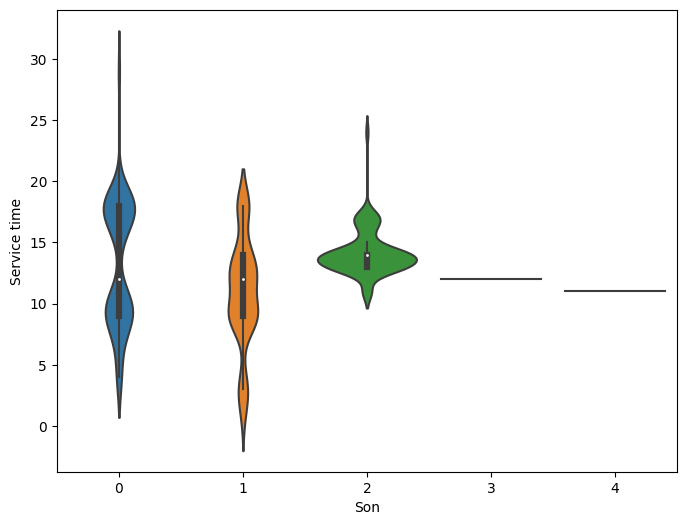

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(x="Son",
               y= "Service time",
               data= preprocessed_data)


From this analysis, we can infer that the number of absence hours for employees
with a greater number of children lies in the range of 10-15 hours. Employees with
less than three children appear to be absent in a varying range of 1-20 hours. To
be specific, employees with no children still have a varying number of absent hours
within the range of 10-15 hours, owing to other reasons, which now opens up a new
area of analysis. On the contrary, employees with one child are absent only for an
average of 5 hours. Employees with two children have an average of 15-25 absent
hours, which could be analyzed further.

Thus, we have successfully drawn measurable conclusions to help us understand
employee behavior in an organization to tackle unregulated absenteeism and take
necessary measures to ensure the optimal utilization of human resources.
